In [2]:

import os, random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical

In [1]:
%cd '/content/drive/MyDrive/BTP/Fashion3'

/content/drive/MyDrive/BTP/Fashion3


In [5]:
def load_and_preprocess_data(debug=False):
    
    from tensorflow.keras.datasets.fashion_mnist import load_data
   

# Step-1: load the raw dataset
    (X_train, y_train), (X_test, y_test) = load_data()

    indexes = np.arange(X_train.shape[0])
    for _ in range(5): indexes = np.random.permutation(indexes)  # shuffle 5 times!
    X_train = X_train[indexes]
    y_train = y_train[indexes]
    X_train1=X_train.copy()
    y_train1=y_train.copy()
      #Train - 80%
      #Valid - 20% 
    val_count = 48000
    X_train=X_train1[:val_count]
    y_train=y_train1[:val_count]
    X_val = X_train1[val_count:]
    y_val = y_train1[val_count:]
    
# Step-3: scale the images
    # scale the images to between 0-1
    X_train = X_train.astype('float32') / 255.0
    X_val = X_val.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

# Step-4: reshape the images into 3D tensors so our CNN can consume it
    # reshape the image arrays (make 2D arrays instead of 3D arrays)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
    y_train=to_categorical(y_train)
    y_val=to_categorical(y_val)
    y_test=to_categorical(y_test)

   

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [6]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_and_preprocess_data()

In [14]:
import tensorflow.keras.backend as K
import keras
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD


IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10

def build_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

                   

In [15]:

model = build_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
trained_model=model.fit(X_train, y_train, epochs=20,
        batch_size=64, validation_data=(X_val, y_val),verbose=1)

Epoch 1/20
750/750 [==============================] - 15s 8ms/step - loss: 0.4747 - accuracy: 0.8309 - val_loss: 0.3534 - val_accuracy: 0.8728
Epoch 2/20
750/750 [==============================] - 6s 7ms/step - loss: 0.3217 - accuracy: 0.8849 - val_loss: 0.3403 - val_accuracy: 0.8784
Epoch 3/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2764 - accuracy: 0.9005 - val_loss: 0.2894 - val_accuracy: 0.8938
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2504 - accuracy: 0.9085 - val_loss: 0.2770 - val_accuracy: 0.9019
Epoch 5/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2215 - accuracy: 0.9184 - val_loss: 0.2758 - val_accuracy: 0.9013
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2032 - accuracy: 0.9256 - val_loss: 0.2624 - val_accuracy: 0.9094
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1849 - accuracy: 0.9324 - val_loss: 0.2511 - val_accuracy: 0.9099
Epoch

In [17]:
model.save('/content/drive/MyDrive/BTP/Fashion3/f3.h5')

In [18]:
model.save('/content/f3.h5')

In [19]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.9094


In [25]:
# load the image
#Correct
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
filename='/pull.png'
img = load_img(filename, grayscale=True, target_size=(28, 28))

# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
y11=model.predict(img)
print(y11)
np.argmax(y11)

[[6.1972976e-08 7.8440374e-14 9.9999976e-01 9.5959764e-13 7.5491091e-10
  2.1262756e-14 6.8697346e-08 2.4374003e-11 1.2866029e-13 8.7668989e-13]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


2

In [21]:
def show_history(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

In [22]:
def show_history1(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

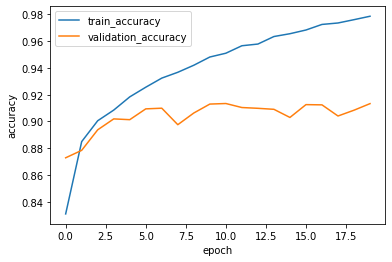

In [23]:
show_history(trained_model)

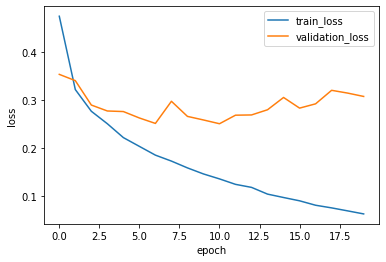

In [24]:
show_history1(trained_model)